In [ ]:
import os
import pandas as pd
import numpy as np
import copy
from numpy import linalg as LA
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading DREAM data**

In [ ]:
dream_file = '/content/drive/Shareddrives/CSCI5461 Homework/HW2/DREAM_data.txt'

In [ ]:
dream_data=pd.read_csv(dream_file,delimiter="\t")

In [ ]:
dream_data

,HGNC_ID,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,Everolimus(mTOR),0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000
1,Disulfiram(ALDH2),0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,...,0.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000
2,Methylglyoxol(Pyruvate),NaN,0.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,1.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,1.000000
3,Mebendazole(Tubulin),NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
4,4-HC(DNA alkylator),NaN,0.000000,1.000000,1.000000,0.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,PIK3IP1,5.094983,5.838762,5.259975,4.581164,6.680903,5.298018,6.048598,4.799027,6.513449,...,5.634955,6.772698,4.818312,5.567047,6.071105,7.162297,7.118008,6.037431,5.063114,4.605722
18633,SNRPD2,8.347877,8.134302,8.465382,8.861059,8.264550,7.961019,8.638154,9.104285,8.273480,...,7.709004,8.019798,8.530214,8.133355,8.620167,8.298169,7.933501,8.802854,8.630818,8.539019
18634,SLC39A6,9.560331,9.230374,8.702158,6.829949,9.895278,11.069736,9.445905,9.809352,7.975159,...,8.164757,7.942354,7.667108,8.665270,9.854913,9.958577,8.303573,12.605733,9.136941,8.826168
18635,CTSC,8.014001,5.489988,6.926434,6.706568,4.959705,5.299012,5.410741,8.671523,7.534491,...,4.963450,6.609082,5.914920,5.701576,5.371800,5.915521,4.797568,5.569548,7.787072,8.315306


In [ ]:
dream_data.head(10)

,HGNC_ID,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,Everolimus(mTOR),0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000
1,Disulfiram(ALDH2),0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,...,0.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000
2,Methylglyoxol(Pyruvate),NaN,0.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,1.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,1.000000
3,Mebendazole(Tubulin),NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
4,4-HC(DNA alkylator),NaN,0.000000,1.000000,1.000000,0.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000
5,C9orf152,3.613030,8.463736,7.935823,3.098928,9.010836,6.238427,7.531960,2.941374,5.048602,...,8.611076,7.479183,2.743167,7.885278,6.478226,9.306710,7.672073,9.016769,3.312954,3.257463
6,ELMO2,7.205940,7.959597,8.073369,8.164778,8.120015,8.950747,7.747369,8.551765,7.708224,...,9.391230,8.086427,7.653533,8.027774,8.112902,8.274168,8.654507,7.907656,8.463506,7.348165
7,RPS11,10.476276,9.939852,9.817430,10.038500,9.533423,9.471906,9.889735,9.852145,9.496845,...,9.025056,9.624821,9.447288,8.779309,9.069048,9.333409,9.360958,10.064785,9.693886,9.858231
8,CREB3L1,5.565989,9.835957,5.696639,4.972852,8.155372,6.437281,6.572890,7.007242,5.386509,...,9.897796,8.059426,7.569412,5.437983,8.168436,7.360383,8.892531,7.051816,7.973954,5.256000
9,PNMA1,7.664038,7.645439,7.761882,7.766212,8.393242,8.081416,7.643172,7.922658,7.409595,...,7.985742,7.395009,8.757817,8.315187,8.430294,7.001755,7.582231,7.348228,8.558804,7.668157


In [ ]:
#Splitting the DREAM data into separate drug senstivity and gene expression datasets
drug_sensitivity = dream_data.iloc[:5, :]
drug_sensitivity.reset_index(drop=True, inplace=True)

gene_expressions = dream_data.iloc[5:, :]
gene_expressions.reset_index(drop=True, inplace=True)

In [ ]:
drug_sensitivity

,HGNC_ID,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,Everolimus(mTOR),0.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0
1,Disulfiram(ALDH2),0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,...,0.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,0.0
2,Methylglyoxol(Pyruvate),NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,0.0,...,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0
3,Mebendazole(Tubulin),NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,4-HC(DNA alkylator),NaN,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0


# **Question 1: k-NN implementation**

In [ ]:
def knn_classifier(k, current_cell_line, gene_expressions_df, drug_name, drug_sensitivity_df):

  cell_line_names = list(gene_expressions_df.columns[1:])
  cell_line_names.remove(current_cell_line)

  pearson_coeffs = {}
  current_cell_expression = list(gene_expressions_df[current_cell_line])

  for compare_cell_line in cell_line_names:
    compare_cell_expression = list(gene_expressions_df[compare_cell_line])
    mean_current = sum(current_cell_expression)/len(current_cell_expression)
    mean_current_list = [sum(current_cell_expression)/len(current_cell_expression)]*len(current_cell_expression)
    mean_compare = sum(compare_cell_expression)/len(compare_cell_expression)
    mean_compare_list = [sum(compare_cell_expression)/len(compare_cell_expression)]*len(compare_cell_expression)

    current_cell_adjusted = np.array([x_i - mx_i for x_i, mx_i in zip(current_cell_expression, mean_current_list)])
    compare_cell_adjusted = np.array([y_i - my_i for y_i, my_i in zip(compare_cell_expression, mean_compare_list)])

    coef = np.inner(current_cell_adjusted, compare_cell_adjusted)/(LA.norm(current_cell_adjusted) * LA.norm(compare_cell_adjusted))

    pearson_coeffs[compare_cell_line] = coef

  pearson_coeffs = dict(sorted(pearson_coeffs.items(), key=lambda item: item[1], reverse=True))
  pearson_keys = list(pearson_coeffs.keys())

  num_sensitive = 0
  num_counted = 0
  i = 0

  while num_counted < k:
    # print('Nearest Neighbor', i , ': ', pearson_keys[i])
    sensitivity_val = drug_sensitivity_df.loc[drug_sensitivity_df['HGNC_ID'] == drug_name, pearson_keys[i]].iloc[0]
    # print("Sensitity val is ", sensitivity_val)
    
    if sensitivity_val == 1.0:
      num_sensitive += 1
      num_counted += 1
    elif sensitivity_val == 0.0:
      num_counted +=1
    else:
      pass
    i+=1

  return num_sensitive/k

# **Question 2: k-NN performance evaluation**


In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
cell_line_names = list(gene_expressions.columns[1:])

#setting plot size params
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
#Creating dataframe for Everolimus(mTOR)
everolimus_mtor_df = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(5, cell_line, gene_expressions, 'Everolimus(mTOR)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Everolimus(mTOR)', cell_line].iloc[0]
  everolimus_mtor_df = everolimus_mtor_df.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
everolimus_mtor_df = everolimus_mtor_df[everolimus_mtor_df['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
everolimus_mtor_df = everolimus_mtor_df.sort_values(by = 'Predicted', ascending=True)

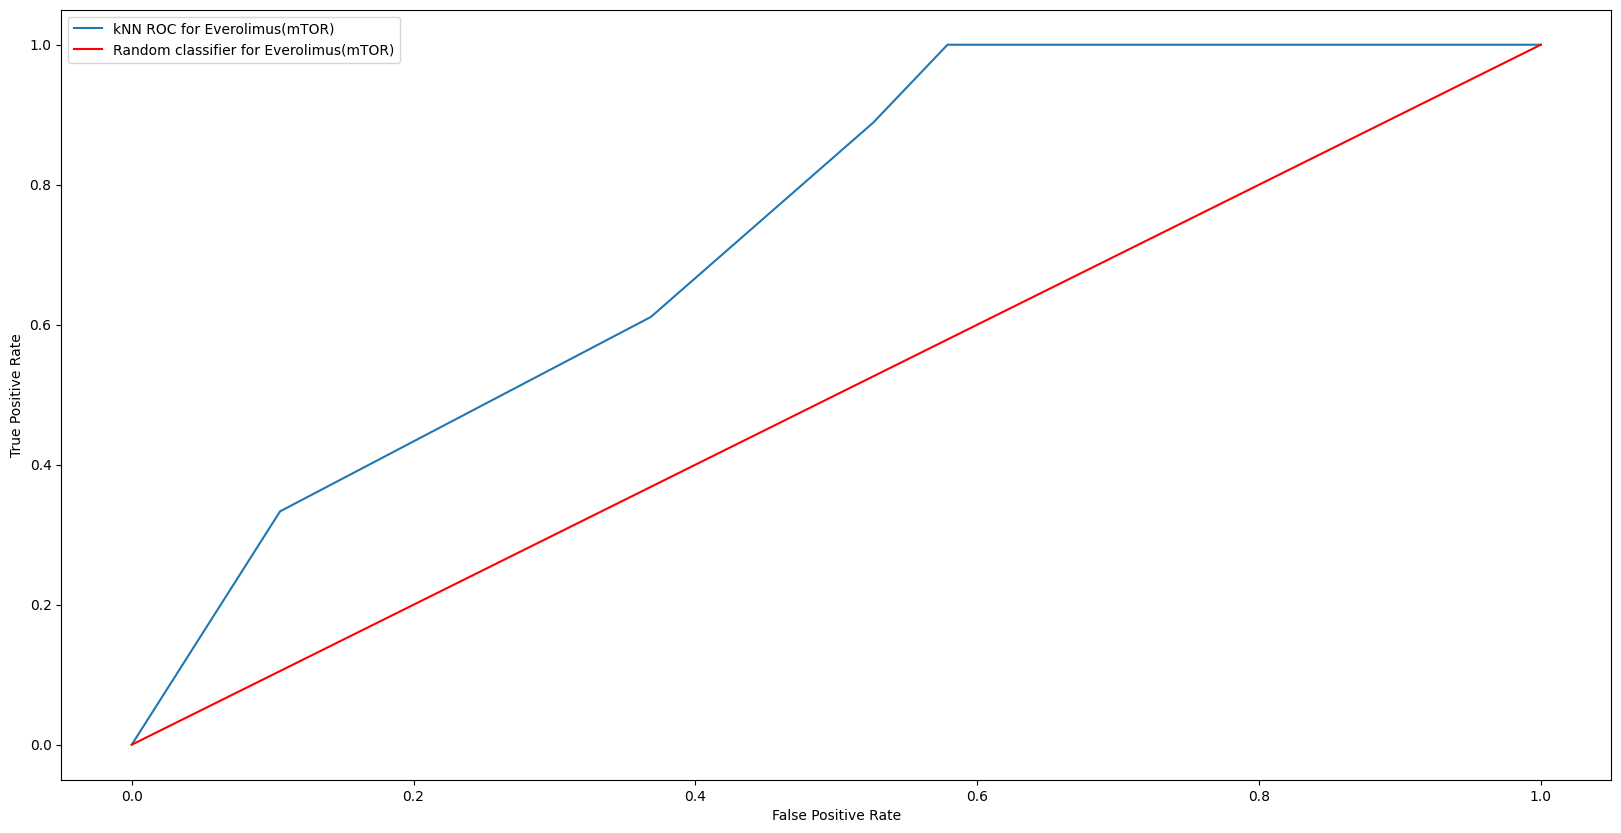

In [ ]:
fpr, tpr, _ = metrics.roc_curve(everolimus_mtor_df['Actual'].values, everolimus_mtor_df['Predicted'].values)
plt.plot(fpr,tpr, label="kNN ROC for Everolimus(mTOR)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Everolimus(mTOR)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Creating dataframe for Disulfiram(ALDH2)
disulfiram_ALDH2_df = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(5, cell_line, gene_expressions, 'Disulfiram(ALDH2)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Disulfiram(ALDH2)', cell_line].iloc[0]
  disulfiram_ALDH2_df = disulfiram_ALDH2_df.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
disulfiram_ALDH2_df = disulfiram_ALDH2_df[disulfiram_ALDH2_df['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
disulfiram_ALDH2_df = disulfiram_ALDH2_df.sort_values(by = 'Predicted', ascending=True)

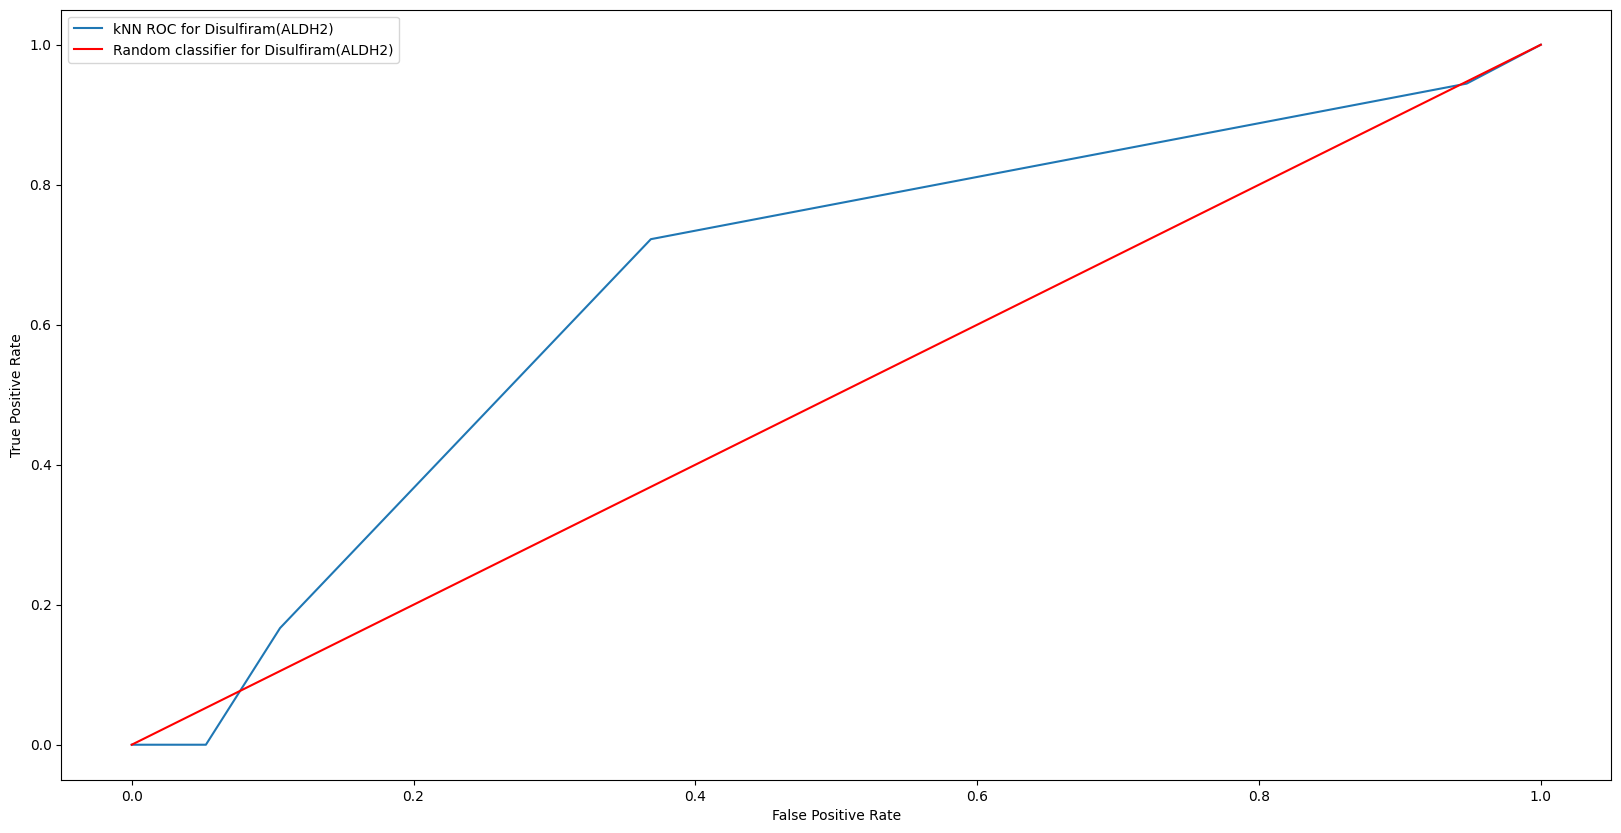

In [ ]:
fpr, tpr, _ = metrics.roc_curve(disulfiram_ALDH2_df['Actual'].values, disulfiram_ALDH2_df['Predicted'].values)
plt.plot(fpr,tpr, label="kNN ROC for Disulfiram(ALDH2)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Disulfiram(ALDH2)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Creating dataframe for Methylglyoxol(Pyruvate)	
methylglyoxol_pyruvate_df = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(5, cell_line, gene_expressions, 'Methylglyoxol(Pyruvate)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Methylglyoxol(Pyruvate)', cell_line].iloc[0]
  methylglyoxol_pyruvate_df = methylglyoxol_pyruvate_df.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
methylglyoxol_pyruvate_df = methylglyoxol_pyruvate_df[methylglyoxol_pyruvate_df['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
methylglyoxol_pyruvate_df = methylglyoxol_pyruvate_df.sort_values(by = 'Predicted', ascending=True)

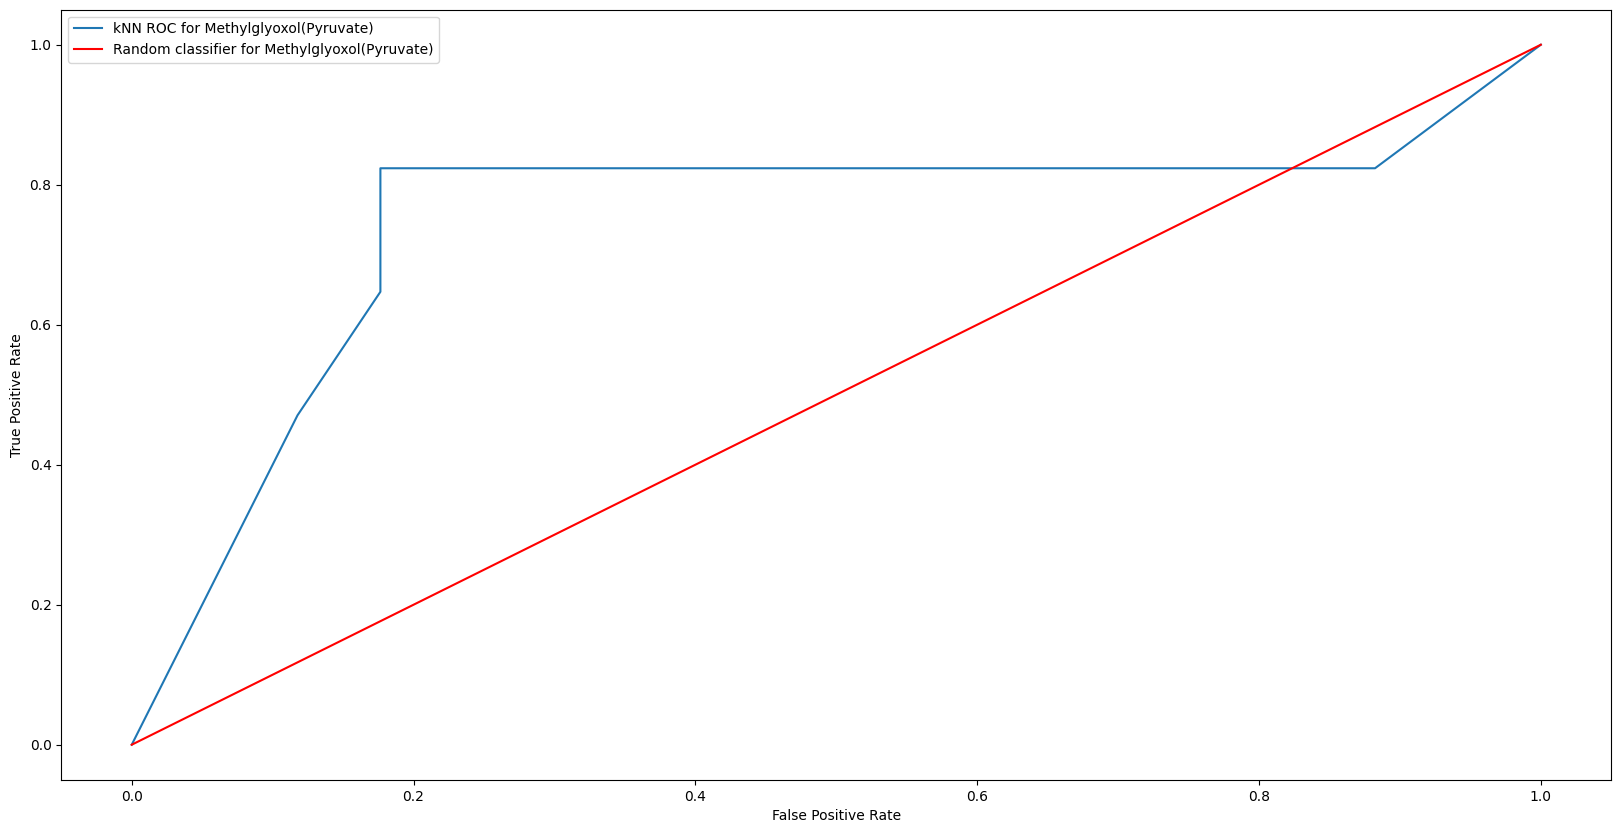

In [ ]:
fpr_best, tpr_best, _ = metrics.roc_curve(methylglyoxol_pyruvate_df['Actual'].values, methylglyoxol_pyruvate_df['Predicted'].values)
plt.plot(fpr_best,tpr_best, label="kNN ROC for Methylglyoxol(Pyruvate)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Methylglyoxol(Pyruvate)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
fpr_best

array([0.        , 0.11764706, 0.17647059, 0.17647059, 0.88235294,
       1.        ])

In [ ]:
tpr_best

array([0.        , 0.47058824, 0.64705882, 0.82352941, 0.82352941,
       1.        ])

In [ ]:
#Creating dataframe for Mebendazole(Tubulin)
mebendazole_tubulin_df = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(5, cell_line, gene_expressions, 'Mebendazole(Tubulin)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Mebendazole(Tubulin)', cell_line].iloc[0]
  mebendazole_tubulin_df = mebendazole_tubulin_df.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
mebendazole_tubulin_df = mebendazole_tubulin_df[mebendazole_tubulin_df['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
mebendazole_tubulin_df = mebendazole_tubulin_df.sort_values(by = 'Predicted', ascending=True)

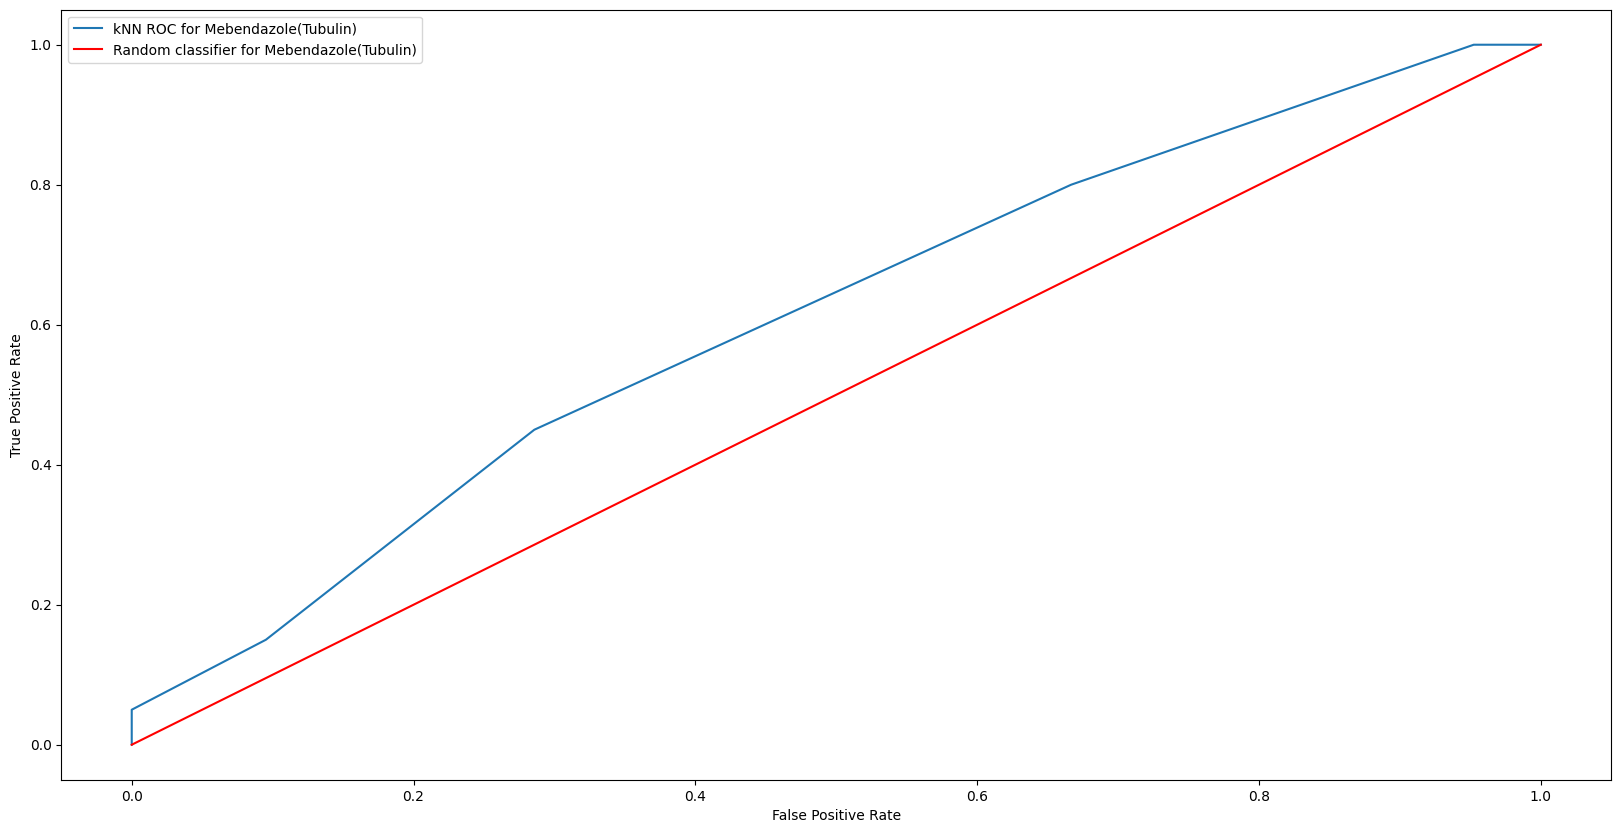

In [ ]:
fpr, tpr, _ = metrics.roc_curve(mebendazole_tubulin_df['Actual'].values, mebendazole_tubulin_df['Predicted'].values)
plt.plot(fpr,tpr, label="kNN ROC for Mebendazole(Tubulin)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Mebendazole(Tubulin)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Creating dataframe for 4-HC(DNA alkylator)
hc4_DNA_alkylator_df = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(5, cell_line, gene_expressions, '4-HC(DNA alkylator)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == '4-HC(DNA alkylator)', cell_line].iloc[0]
  hc4_DNA_alkylator_df = hc4_DNA_alkylator_df.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
hc4_DNA_alkylator_df = hc4_DNA_alkylator_df[hc4_DNA_alkylator_df['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
hc4_DNA_alkylator_df = hc4_DNA_alkylator_df.sort_values(by = 'Predicted', ascending=True)

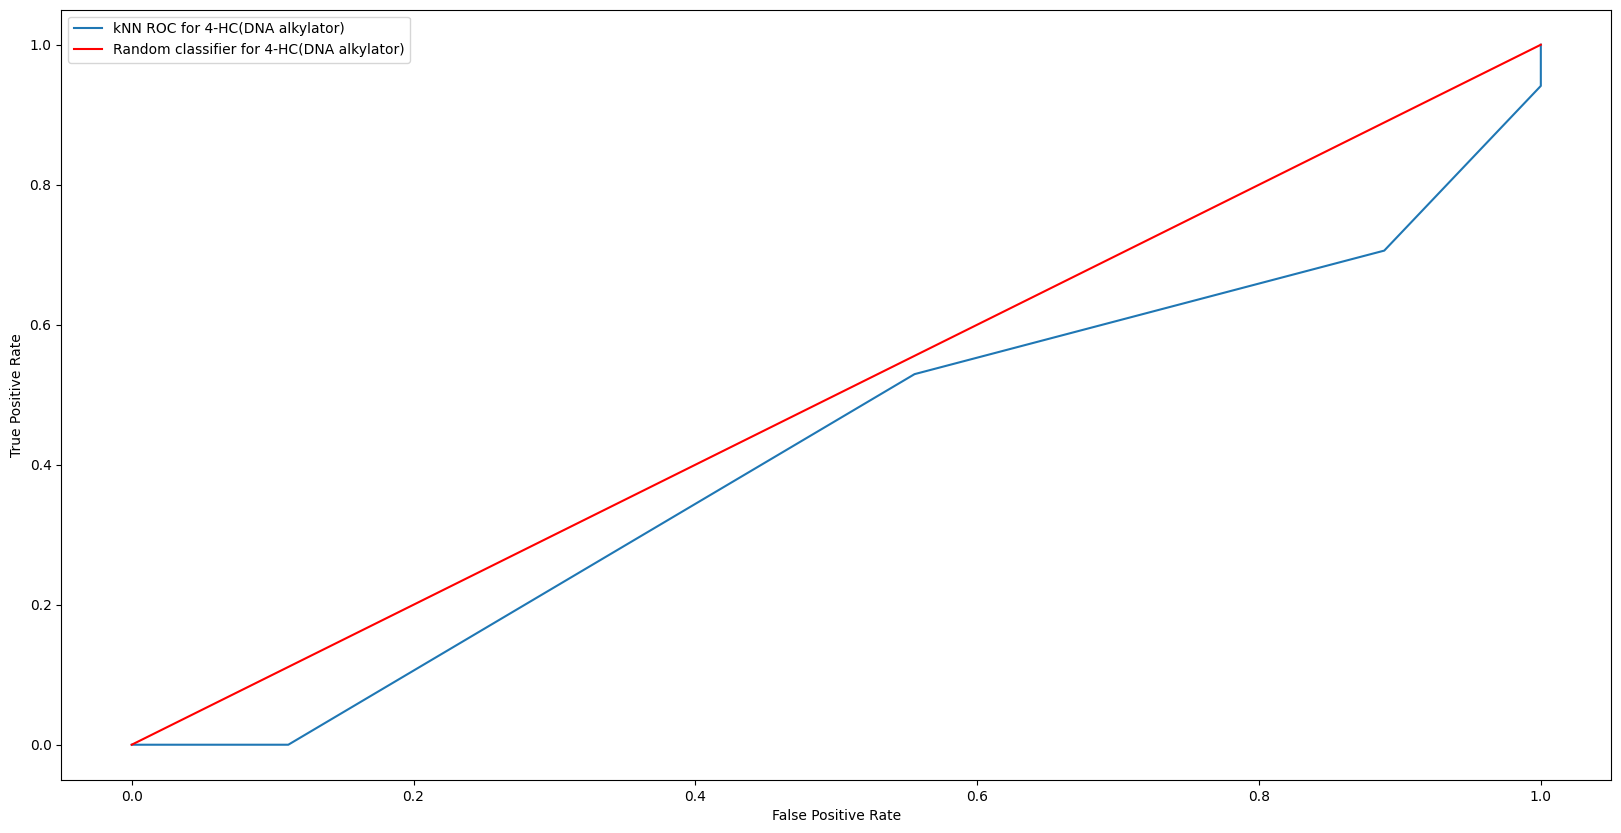

In [ ]:
fpr, tpr, _ = metrics.roc_curve(hc4_DNA_alkylator_df['Actual'].values, hc4_DNA_alkylator_df['Predicted'].values)
plt.plot(fpr,tpr, label="kNN ROC for 4-HC(DNA alkylator)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for 4-HC(DNA alkylator)")
plt.legend(loc="upper left")
plt.show()

# **Question 3a: Exploration of parameters affecting kNN performance**

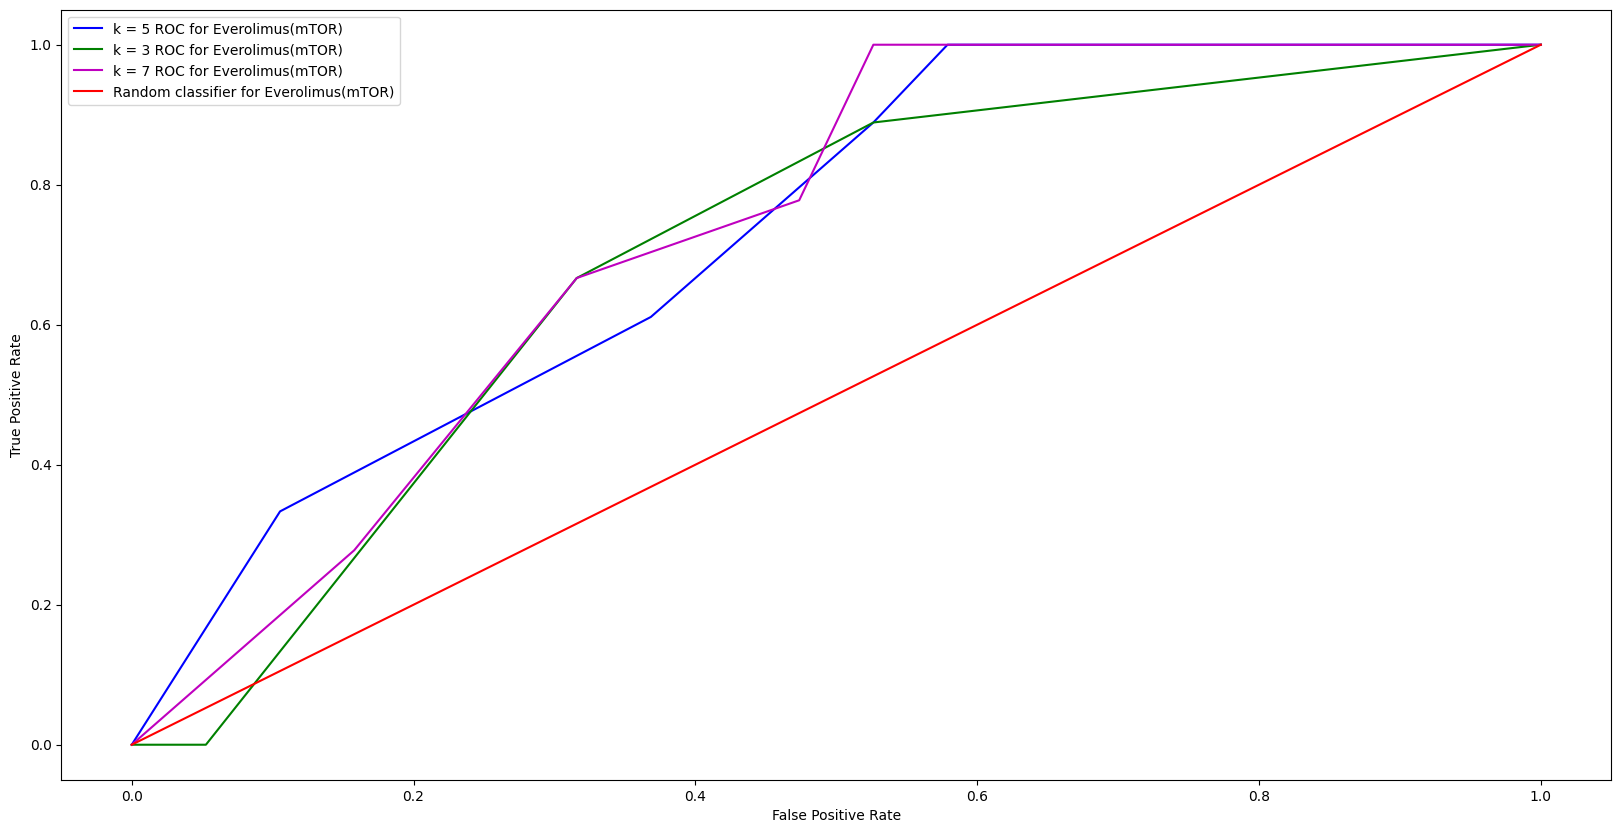

In [ ]:
#Creating dataframe for Everolimus(mTOR)

#---------------------------------------k = 3---------------------------------------#
everolimus_mtor_df_3 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(3, cell_line, gene_expressions, 'Everolimus(mTOR)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Everolimus(mTOR)', cell_line].iloc[0]
  everolimus_mtor_df_3 = everolimus_mtor_df_3.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
everolimus_mtor_df_3 = everolimus_mtor_df_3[everolimus_mtor_df_3['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
everolimus_mtor_df_3 = everolimus_mtor_df_3.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

#---------------------------------------k = 7---------------------------------------#
everolimus_mtor_df_7 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(7, cell_line, gene_expressions, 'Everolimus(mTOR)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Everolimus(mTOR)', cell_line].iloc[0]
  everolimus_mtor_df_7 = everolimus_mtor_df_7.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
everolimus_mtor_df_7 = everolimus_mtor_df_7[everolimus_mtor_df_7['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
everolimus_mtor_df_7 = everolimus_mtor_df_7.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

fpr_5, tpr_5, _ = metrics.roc_curve(everolimus_mtor_df['Actual'].values, everolimus_mtor_df['Predicted'].values)
fpr_3, tpr_3, _ = metrics.roc_curve(everolimus_mtor_df_3['Actual'].values, everolimus_mtor_df_3['Predicted'].values)
fpr_7, tpr_7, _ = metrics.roc_curve(everolimus_mtor_df_7['Actual'].values, everolimus_mtor_df_7['Predicted'].values)

plt.plot(fpr_5,tpr_5, '-b', label="k = 5 ROC for Everolimus(mTOR)")
plt.plot(fpr_3,tpr_3, '-g', label="k = 3 ROC for Everolimus(mTOR)")
plt.plot(fpr_7,tpr_7, '-m', label="k = 7 ROC for Everolimus(mTOR)")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Everolimus(mTOR)")
plt.legend(loc="upper left")
plt.show()

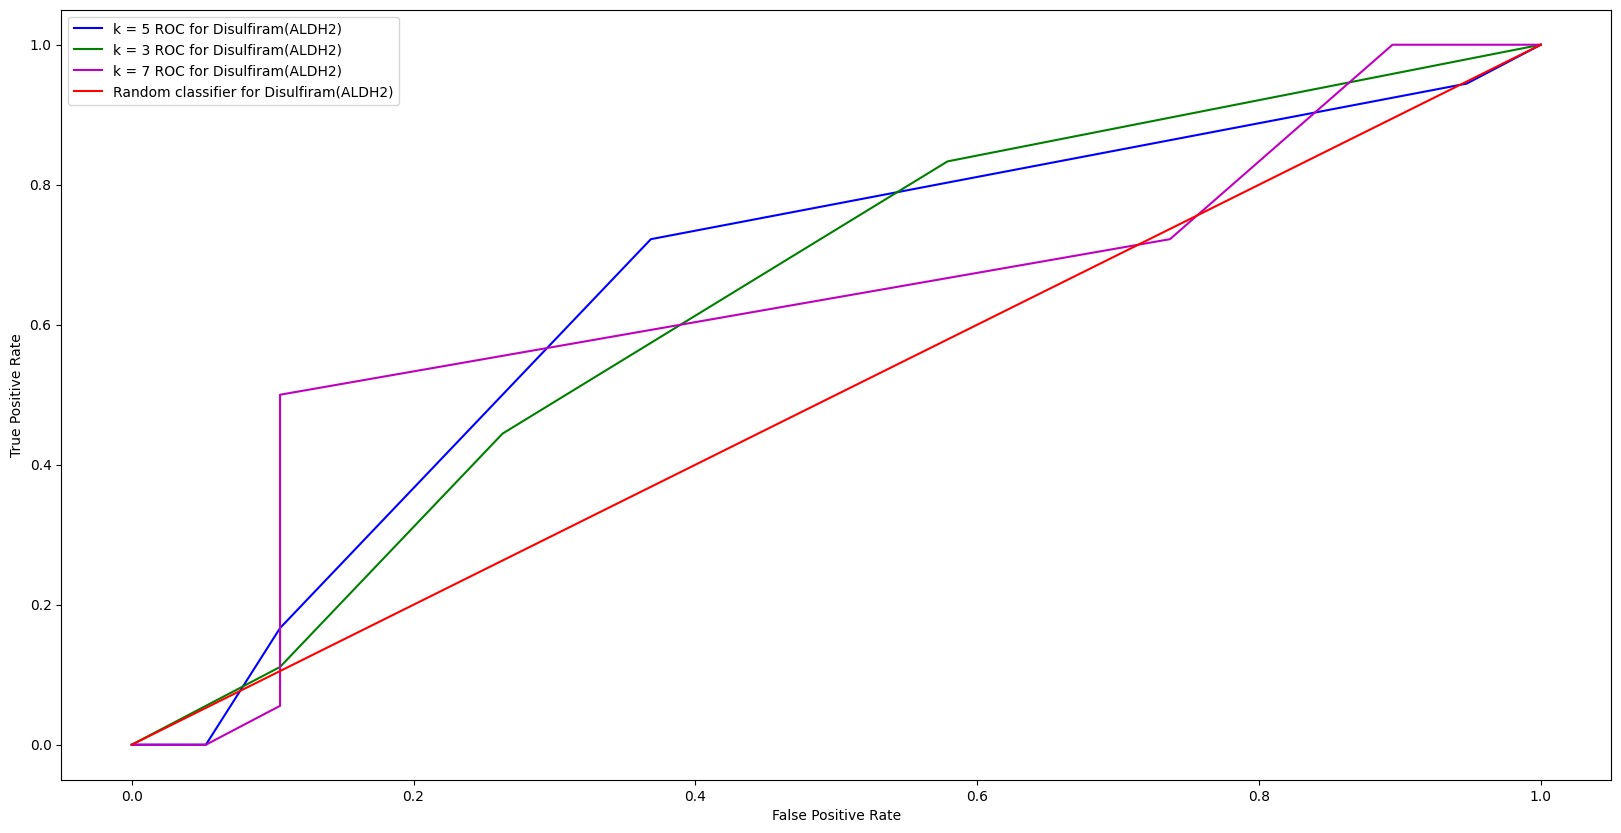

In [ ]:
#Creating dataframe for Disulfiram(ALDH2)

#---------------------------------------k = 3---------------------------------------#
disulfiram_ALDH2_df_3 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(3, cell_line, gene_expressions, 'Disulfiram(ALDH2)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Disulfiram(ALDH2)', cell_line].iloc[0]
  disulfiram_ALDH2_df_3 = disulfiram_ALDH2_df_3.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
disulfiram_ALDH2_df_3 = disulfiram_ALDH2_df_3[disulfiram_ALDH2_df_3['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
disulfiram_ALDH2_df_3 = disulfiram_ALDH2_df_3.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

#---------------------------------------k = 7---------------------------------------#
disulfiram_ALDH2_df_7 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(7, cell_line, gene_expressions, 'Disulfiram(ALDH2)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Disulfiram(ALDH2)', cell_line].iloc[0]
  disulfiram_ALDH2_df_7 = disulfiram_ALDH2_df_7.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
disulfiram_ALDH2_df_7 = disulfiram_ALDH2_df_7[disulfiram_ALDH2_df_7['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
disulfiram_ALDH2_df_7 = disulfiram_ALDH2_df_7.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

fpr_5, tpr_5, _ = metrics.roc_curve(disulfiram_ALDH2_df['Actual'].values, disulfiram_ALDH2_df['Predicted'].values)
fpr_3, tpr_3, _ = metrics.roc_curve(disulfiram_ALDH2_df_3['Actual'].values, disulfiram_ALDH2_df_3['Predicted'].values)
fpr_7, tpr_7, _ = metrics.roc_curve(disulfiram_ALDH2_df_7['Actual'].values, disulfiram_ALDH2_df_7['Predicted'].values)

plt.plot(fpr_5,tpr_5, '-b', label="k = 5 ROC for Disulfiram(ALDH2)")
plt.plot(fpr_3,tpr_3, '-g', label="k = 3 ROC for Disulfiram(ALDH2)")
plt.plot(fpr_7,tpr_7, '-m', label="k = 7 ROC for Disulfiram(ALDH2)")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Disulfiram(ALDH2)")
plt.legend(loc="upper left")
plt.show()

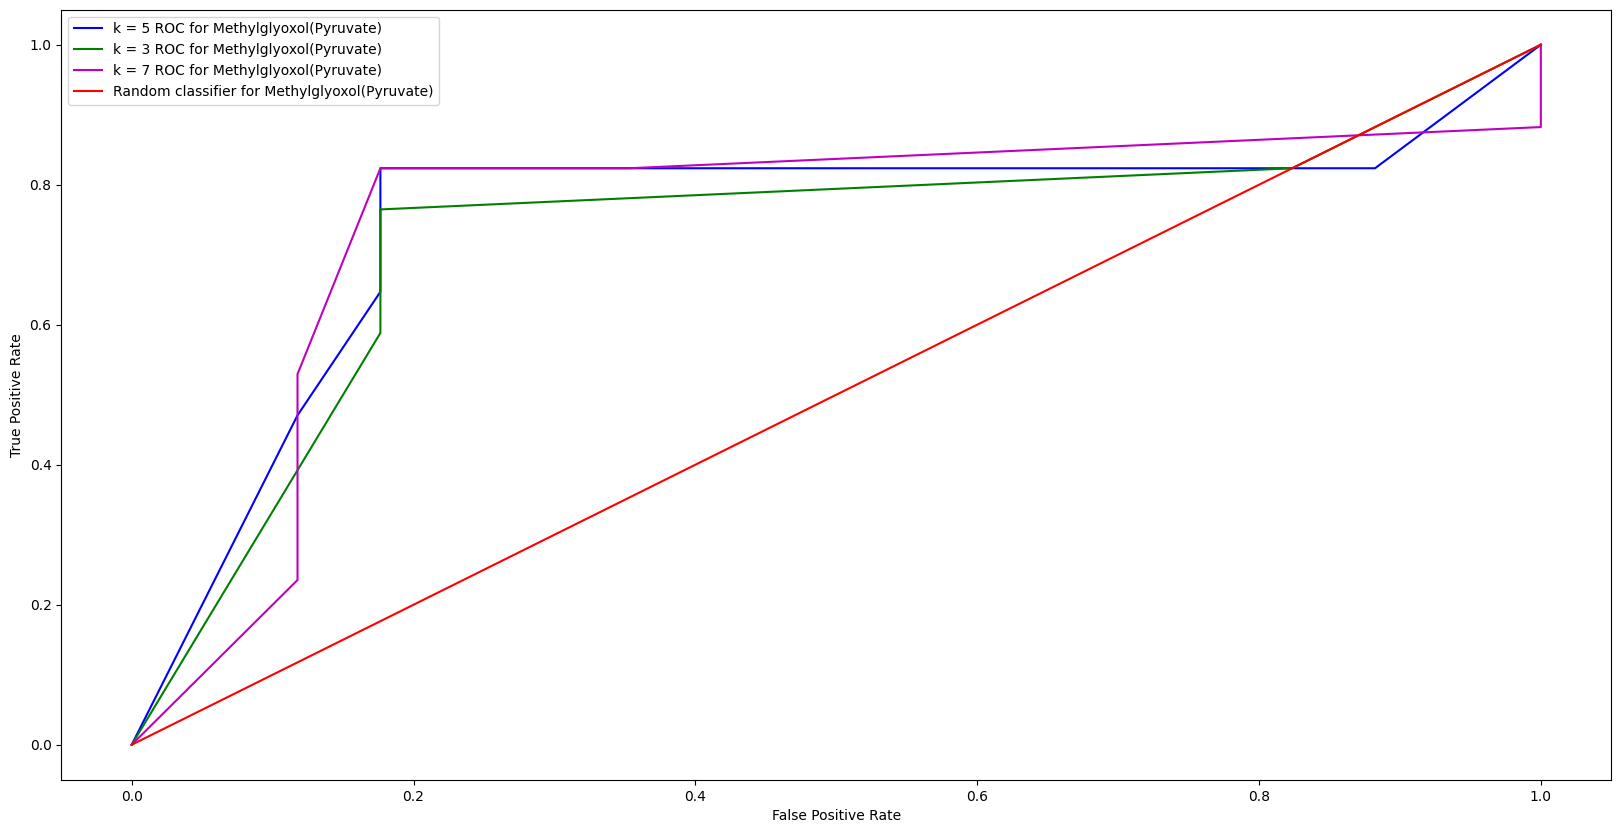

In [ ]:
#Creating dataframe for Methylglyoxol(Pyruvate)	

#---------------------------------------k = 3---------------------------------------#
methylglyoxol_pyruvate_df_3 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(3, cell_line, gene_expressions, 'Methylglyoxol(Pyruvate)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Methylglyoxol(Pyruvate)', cell_line].iloc[0]
  methylglyoxol_pyruvate_df_3 = methylglyoxol_pyruvate_df_3.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
methylglyoxol_pyruvate_df_3 = methylglyoxol_pyruvate_df_3[methylglyoxol_pyruvate_df_3['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
methylglyoxol_pyruvate_df_3 = methylglyoxol_pyruvate_df_3.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

#---------------------------------------k = 7---------------------------------------#
methylglyoxol_pyruvate_df_7 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(7, cell_line, gene_expressions, 'Methylglyoxol(Pyruvate)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Methylglyoxol(Pyruvate)', cell_line].iloc[0]
  methylglyoxol_pyruvate_df_7 = methylglyoxol_pyruvate_df_7.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
methylglyoxol_pyruvate_df_7 = methylglyoxol_pyruvate_df_7[methylglyoxol_pyruvate_df_7['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
methylglyoxol_pyruvate_df_7 = methylglyoxol_pyruvate_df_7.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

fpr_5, tpr_5, _ = metrics.roc_curve(methylglyoxol_pyruvate_df['Actual'].values, methylglyoxol_pyruvate_df['Predicted'].values)
fpr_3, tpr_3, _ = metrics.roc_curve(methylglyoxol_pyruvate_df_3['Actual'].values, methylglyoxol_pyruvate_df_3['Predicted'].values)
fpr_7, tpr_7, _ = metrics.roc_curve(methylglyoxol_pyruvate_df_7['Actual'].values, methylglyoxol_pyruvate_df_7['Predicted'].values)

plt.plot(fpr_5,tpr_5, '-b', label="k = 5 ROC for Methylglyoxol(Pyruvate)")
plt.plot(fpr_3,tpr_3, '-g', label="k = 3 ROC for Methylglyoxol(Pyruvate)")
plt.plot(fpr_7,tpr_7, '-m', label="k = 7 ROC for Methylglyoxol(Pyruvate)")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Methylglyoxol(Pyruvate)")
plt.legend(loc="upper left")
plt.show()

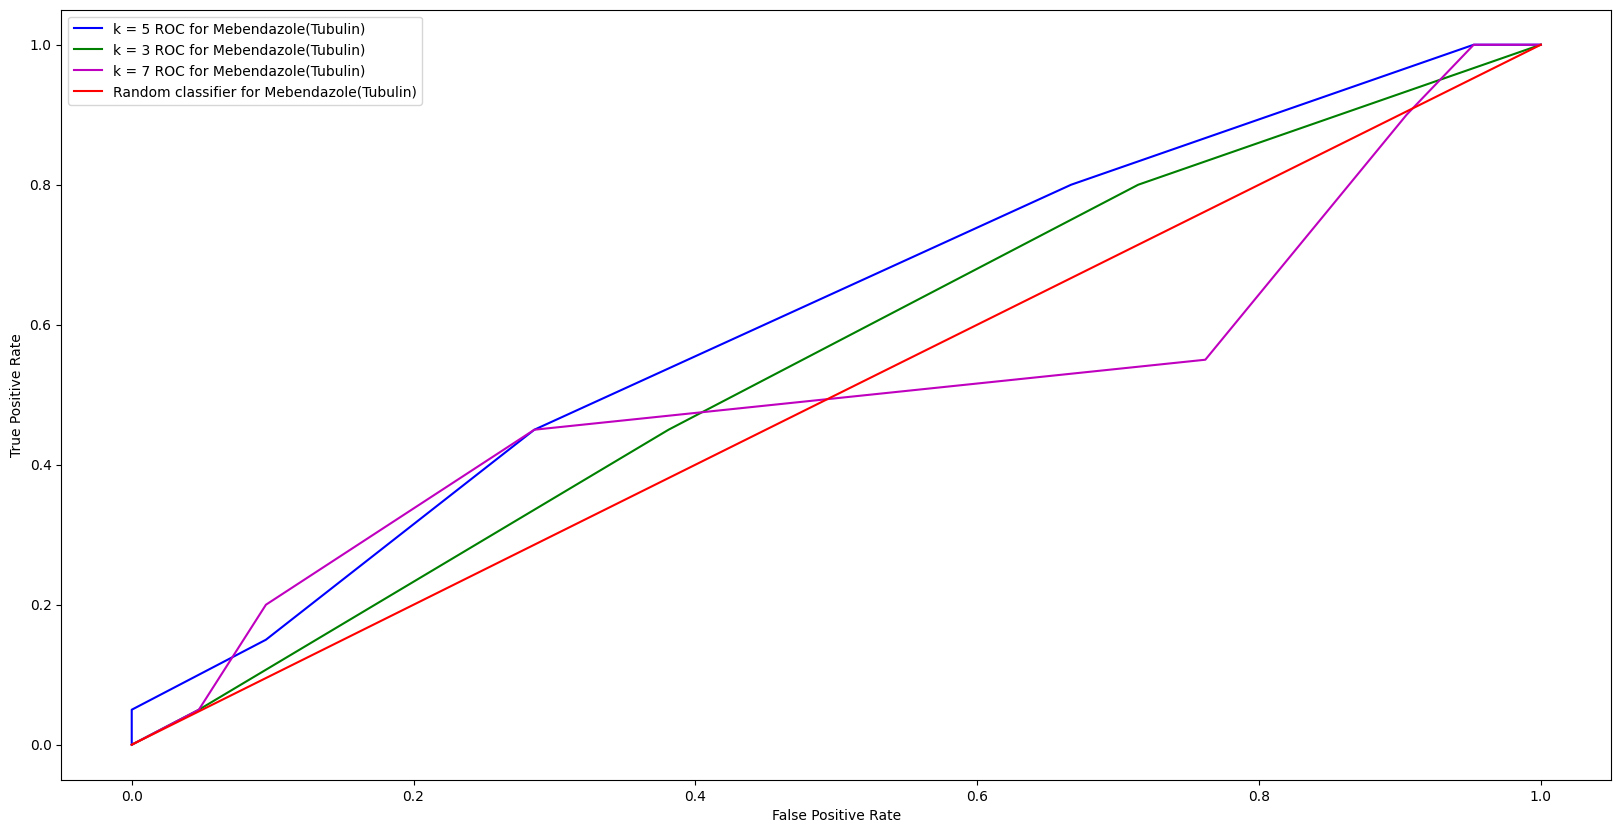

In [ ]:
#Creating dataframe for Mebendazole(Tubulin)

#---------------------------------------k = 3---------------------------------------#
mebendazole_tubulin_df_3 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(3, cell_line, gene_expressions, 'Mebendazole(Tubulin)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Mebendazole(Tubulin)', cell_line].iloc[0]
  mebendazole_tubulin_df_3 = mebendazole_tubulin_df_3.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
mebendazole_tubulin_df_3 = mebendazole_tubulin_df_3[mebendazole_tubulin_df_3['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
mebendazole_tubulin_df_3 = mebendazole_tubulin_df_3.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

#---------------------------------------k = 7---------------------------------------#
mebendazole_tubulin_df_7 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(7, cell_line, gene_expressions, 'Mebendazole(Tubulin)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Mebendazole(Tubulin)', cell_line].iloc[0]
  mebendazole_tubulin_df_7 = mebendazole_tubulin_df_7.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
mebendazole_tubulin_df_7 = mebendazole_tubulin_df_7[mebendazole_tubulin_df_7['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
mebendazole_tubulin_df_7 = mebendazole_tubulin_df_7.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

fpr_5, tpr_5, _ = metrics.roc_curve(mebendazole_tubulin_df['Actual'].values, mebendazole_tubulin_df['Predicted'].values)
fpr_3, tpr_3, _ = metrics.roc_curve(mebendazole_tubulin_df_3['Actual'].values, mebendazole_tubulin_df_3['Predicted'].values)
fpr_7, tpr_7, _ = metrics.roc_curve(mebendazole_tubulin_df_7['Actual'].values, mebendazole_tubulin_df_7['Predicted'].values)

plt.plot(fpr_5,tpr_5, '-b', label="k = 5 ROC for Mebendazole(Tubulin)")
plt.plot(fpr_3,tpr_3, '-g', label="k = 3 ROC for Mebendazole(Tubulin)")
plt.plot(fpr_7,tpr_7, '-m', label="k = 7 ROC for Mebendazole(Tubulin)")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Mebendazole(Tubulin)")
plt.legend(loc="upper left")
plt.show()

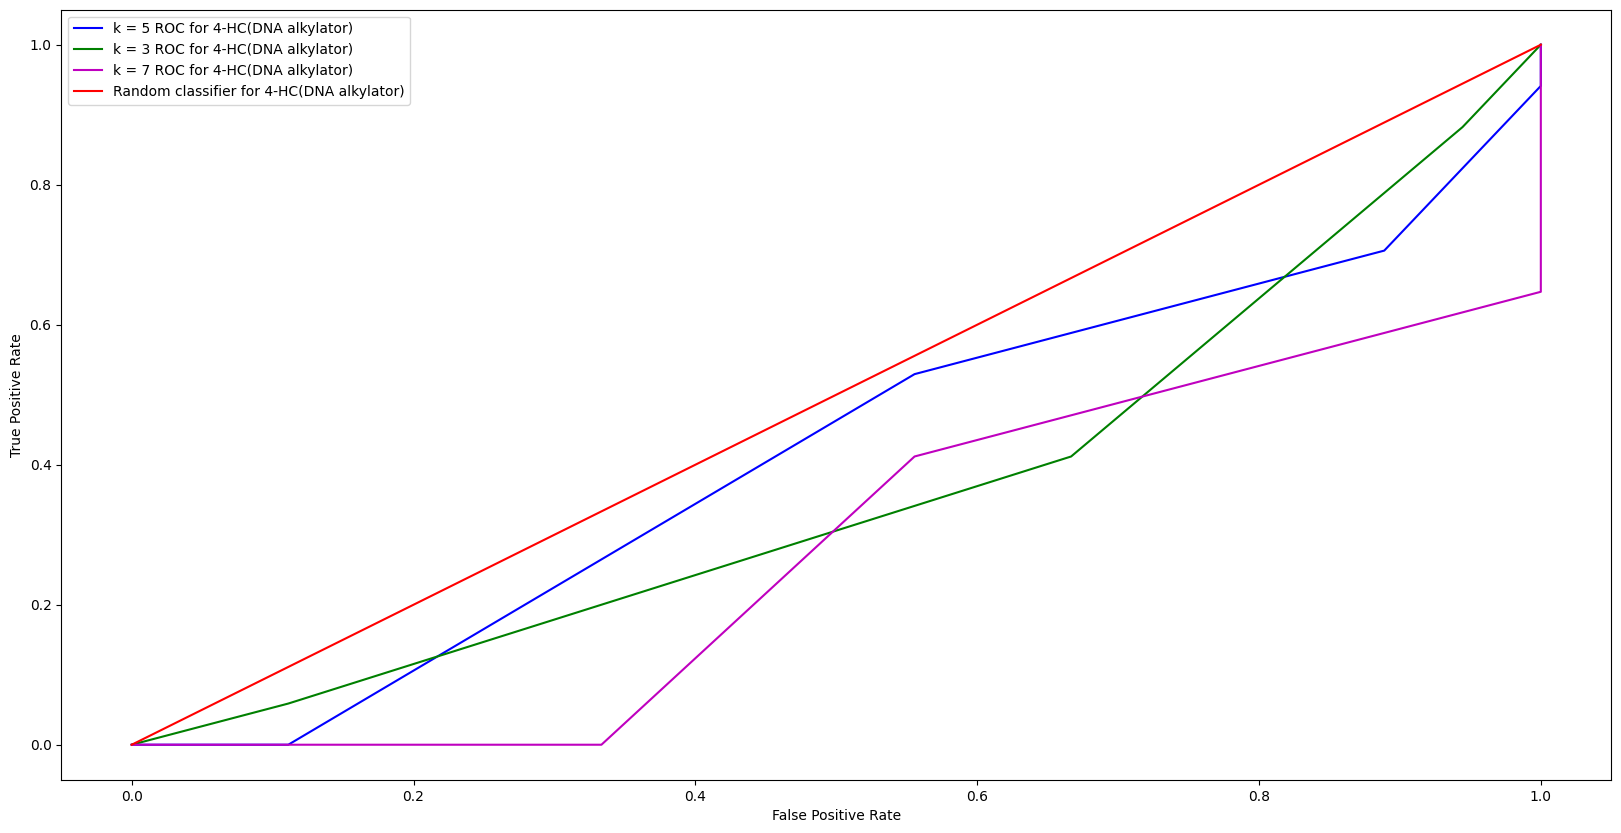

In [ ]:
#Creating dataframe for 4-HC(DNA alkylator)

#---------------------------------------k = 3---------------------------------------#
hc4_DNA_alkylator_df_3 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(3, cell_line, gene_expressions, '4-HC(DNA alkylator)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == '4-HC(DNA alkylator)', cell_line].iloc[0]
  hc4_DNA_alkylator_df_3 = hc4_DNA_alkylator_df_3.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
hc4_DNA_alkylator_df_3 = hc4_DNA_alkylator_df_3[hc4_DNA_alkylator_df_3['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
hc4_DNA_alkylator_df_3 = hc4_DNA_alkylator_df_3.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

#---------------------------------------k = 7---------------------------------------#
hc4_DNA_alkylator_df_7 = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier(7, cell_line, gene_expressions, '4-HC(DNA alkylator)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == '4-HC(DNA alkylator)', cell_line].iloc[0]
  hc4_DNA_alkylator_df_7 = hc4_DNA_alkylator_df_7.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
hc4_DNA_alkylator_df_7 = hc4_DNA_alkylator_df_7[hc4_DNA_alkylator_df_7['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
hc4_DNA_alkylator_df_7 = hc4_DNA_alkylator_df_7.sort_values(by = 'Predicted', ascending=True)
#-----------------------------------------------------------------------------------#

fpr_5, tpr_5, _ = metrics.roc_curve(hc4_DNA_alkylator_df['Actual'].values, hc4_DNA_alkylator_df['Predicted'].values)
fpr_3, tpr_3, _ = metrics.roc_curve(hc4_DNA_alkylator_df_3['Actual'].values, hc4_DNA_alkylator_df_3['Predicted'].values)
fpr_7, tpr_7, _ = metrics.roc_curve(hc4_DNA_alkylator_df_7['Actual'].values, hc4_DNA_alkylator_df_7['Predicted'].values)

plt.plot(fpr_5,tpr_5, '-b', label="k = 5 ROC for 4-HC(DNA alkylator)")
plt.plot(fpr_3,tpr_3, '-g', label="k = 3 ROC for 4-HC(DNA alkylator)")
plt.plot(fpr_7,tpr_7, '-m', label="k = 7 ROC for 4-HC(DNA alkylator)")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for 4-HC(DNA alkylator)")
plt.legend(loc="upper left")
plt.show()

# **Question 3b: Exploration of parameters affecting kNN performance**

In [ ]:
def knn_classifier_weighted(k, current_cell_line, gene_expressions_df, drug_name, drug_sensitivity_df):

  cell_line_names = list(gene_expressions_df.columns[1:])
  cell_line_names.remove(current_cell_line)

  pearson_coeffs = {}
  current_cell_expression = list(gene_expressions_df[current_cell_line])

  for compare_cell_line in cell_line_names:
    compare_cell_expression = list(gene_expressions_df[compare_cell_line])
    mean_current = sum(current_cell_expression)/len(current_cell_expression)
    mean_current_list = [sum(current_cell_expression)/len(current_cell_expression)]*len(current_cell_expression)
    mean_compare = sum(compare_cell_expression)/len(compare_cell_expression)
    mean_compare_list = [sum(compare_cell_expression)/len(compare_cell_expression)]*len(compare_cell_expression)

    current_cell_adjusted = np.array([x_i - mx_i for x_i, mx_i in zip(current_cell_expression, mean_current_list)])
    compare_cell_adjusted = np.array([y_i - my_i for y_i, my_i in zip(compare_cell_expression, mean_compare_list)])

    coef = np.inner(current_cell_adjusted, compare_cell_adjusted)/(LA.norm(current_cell_adjusted) * LA.norm(compare_cell_adjusted))

    pearson_coeffs[compare_cell_line] = coef

  pearson_coeffs = dict(sorted(pearson_coeffs.items(), key=lambda item: item[1], reverse=True))
  pearson_keys = list(pearson_coeffs.keys())

  i = 0
  num_counted = 0
  weighted_sum = 0.0

  while num_counted < k:

    sensitivity_val = drug_sensitivity_df.loc[drug_sensitivity_df['HGNC_ID'] == drug_name, pearson_keys[i]].iloc[0]
    p_coef = pearson_coeffs[pearson_keys[i]]
    
    if sensitivity_val == 1.0:
      weighted_sum += 1*p_coef
      num_counted += 1
    elif sensitivity_val == 0.0:
      weighted_sum += (-1)*p_coef
      num_counted +=1
    else:
      pass
    i+=1

  return weighted_sum

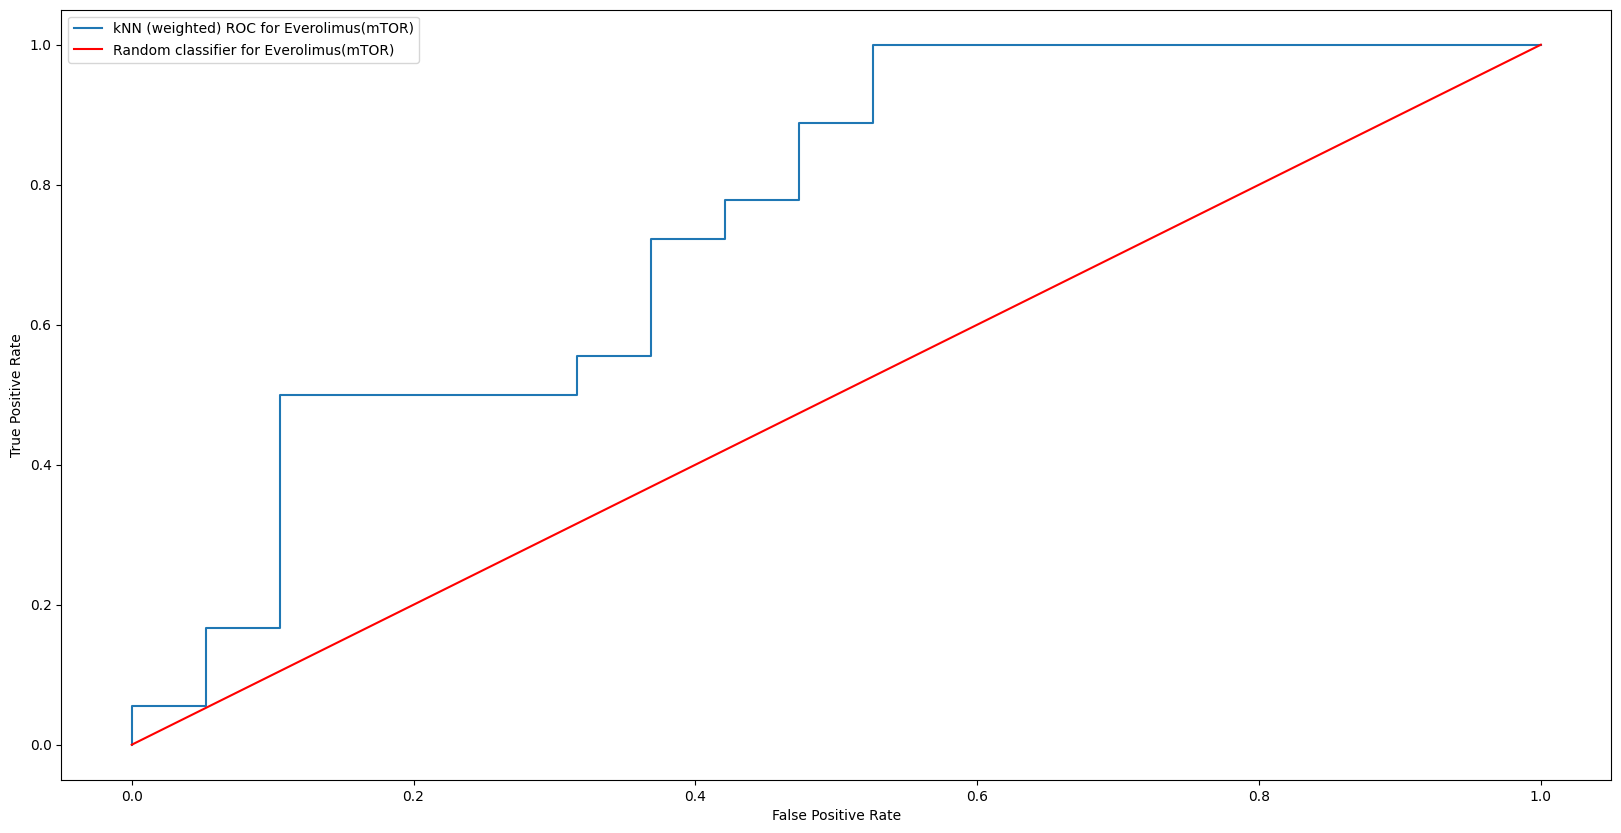

In [ ]:
#Creating dataframe for Everolimus(mTOR)
everolimus_mtor_df_weighted = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier_weighted(5, cell_line, gene_expressions, 'Everolimus(mTOR)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Everolimus(mTOR)', cell_line].iloc[0]
  everolimus_mtor_df_weighted = everolimus_mtor_df_weighted.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
everolimus_mtor_df_weighted = everolimus_mtor_df_weighted[everolimus_mtor_df_weighted['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
everolimus_mtor_df_weighted = everolimus_mtor_df_weighted.sort_values(by = 'Predicted', ascending=True)

fpr, tpr, _ = metrics.roc_curve(everolimus_mtor_df_weighted['Actual'].values, everolimus_mtor_df_weighted['Predicted'].values)
plt.plot(fpr,tpr, label="kNN (weighted) ROC for Everolimus(mTOR)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Everolimus(mTOR)")
plt.legend(loc="upper left")
plt.show()

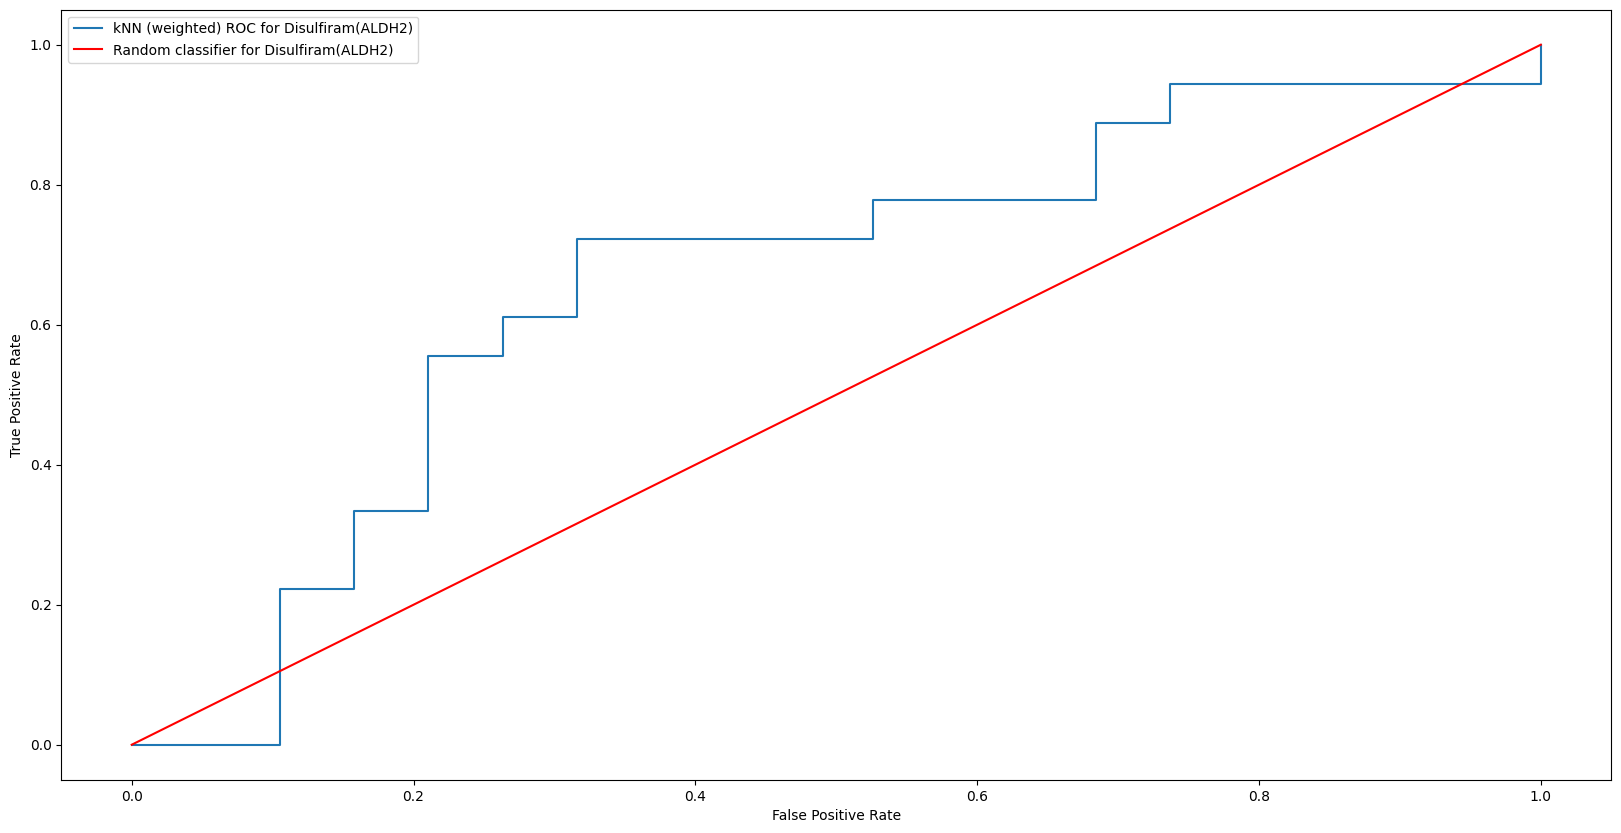

In [ ]:
#Creating dataframe for Disulfiram(ALDH2)
disulfiram_ALDH2_df_weighted = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier_weighted(5, cell_line, gene_expressions, 'Disulfiram(ALDH2)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Disulfiram(ALDH2)', cell_line].iloc[0]
  disulfiram_ALDH2_df_weighted = disulfiram_ALDH2_df_weighted.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
disulfiram_ALDH2_df_weighted = disulfiram_ALDH2_df_weighted[disulfiram_ALDH2_df_weighted['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
disulfiram_ALDH2_df_weighted = disulfiram_ALDH2_df_weighted.sort_values(by = 'Predicted', ascending=True)

fpr, tpr, _ = metrics.roc_curve(disulfiram_ALDH2_df_weighted['Actual'].values, disulfiram_ALDH2_df_weighted['Predicted'].values)
plt.plot(fpr,tpr, label="kNN (weighted) ROC for Disulfiram(ALDH2)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Disulfiram(ALDH2)")
plt.legend(loc="upper left")
plt.show()

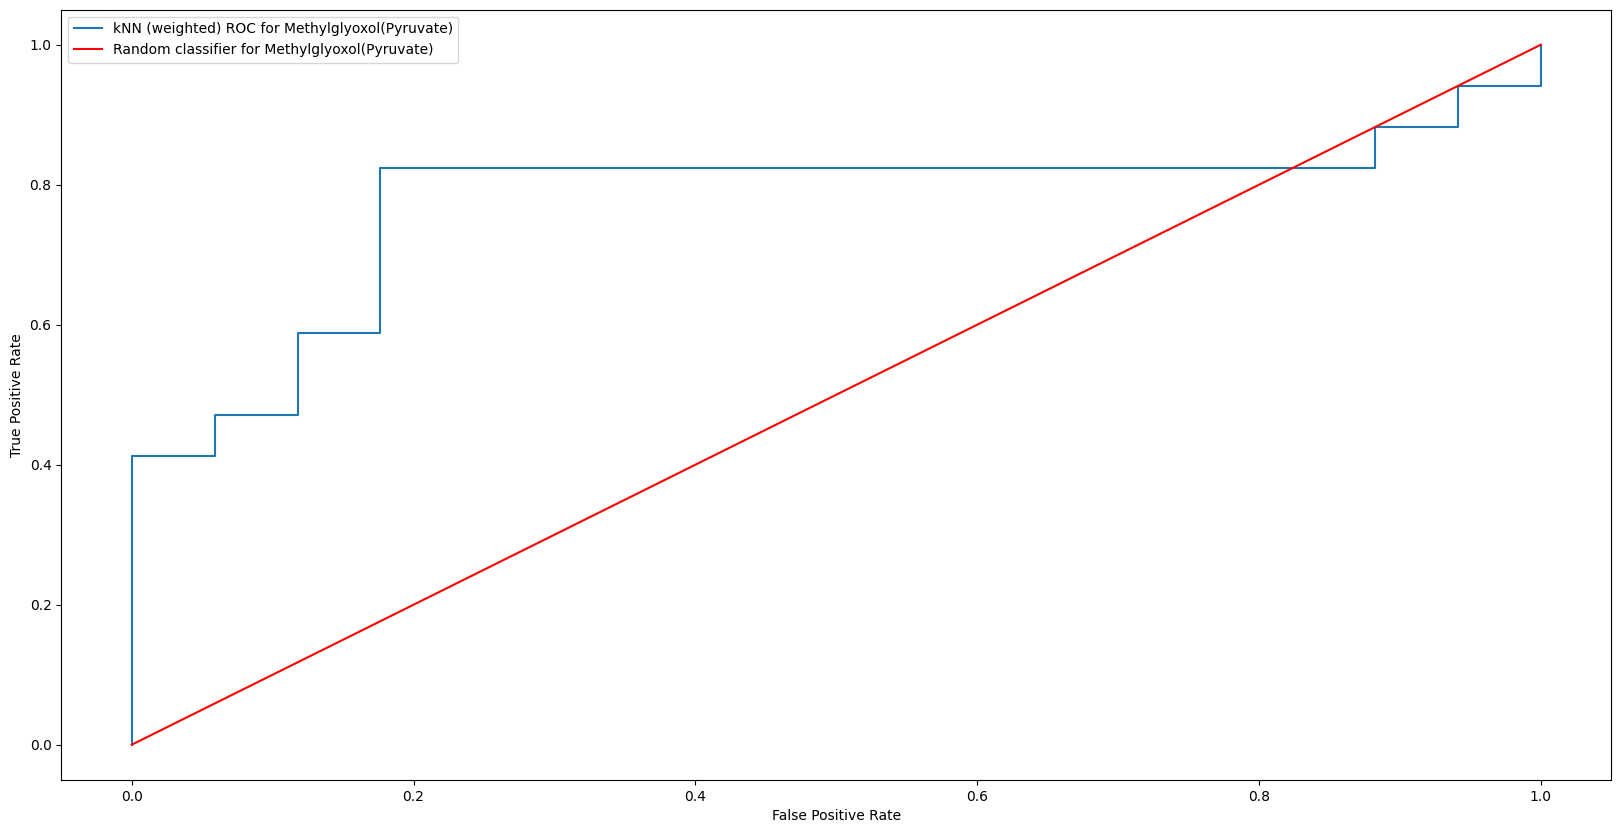

In [ ]:
#Creating dataframe for Methylglyoxol(Pyruvate)	
methylglyoxol_pyruvate_df_weighted = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier_weighted(5, cell_line, gene_expressions, 'Methylglyoxol(Pyruvate)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Methylglyoxol(Pyruvate)', cell_line].iloc[0]
  methylglyoxol_pyruvate_df_weighted = methylglyoxol_pyruvate_df_weighted.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
methylglyoxol_pyruvate_df_weighted = methylglyoxol_pyruvate_df_weighted[methylglyoxol_pyruvate_df_weighted['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
methylglyoxol_pyruvate_df_weighted = methylglyoxol_pyruvate_df_weighted.sort_values(by = 'Predicted', ascending=True)

fpr, tpr, _ = metrics.roc_curve(methylglyoxol_pyruvate_df_weighted['Actual'].values, methylglyoxol_pyruvate_df_weighted['Predicted'].values)
plt.plot(fpr,tpr, label="kNN (weighted) ROC for Methylglyoxol(Pyruvate)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Methylglyoxol(Pyruvate)")
plt.legend(loc="upper left")
plt.show()

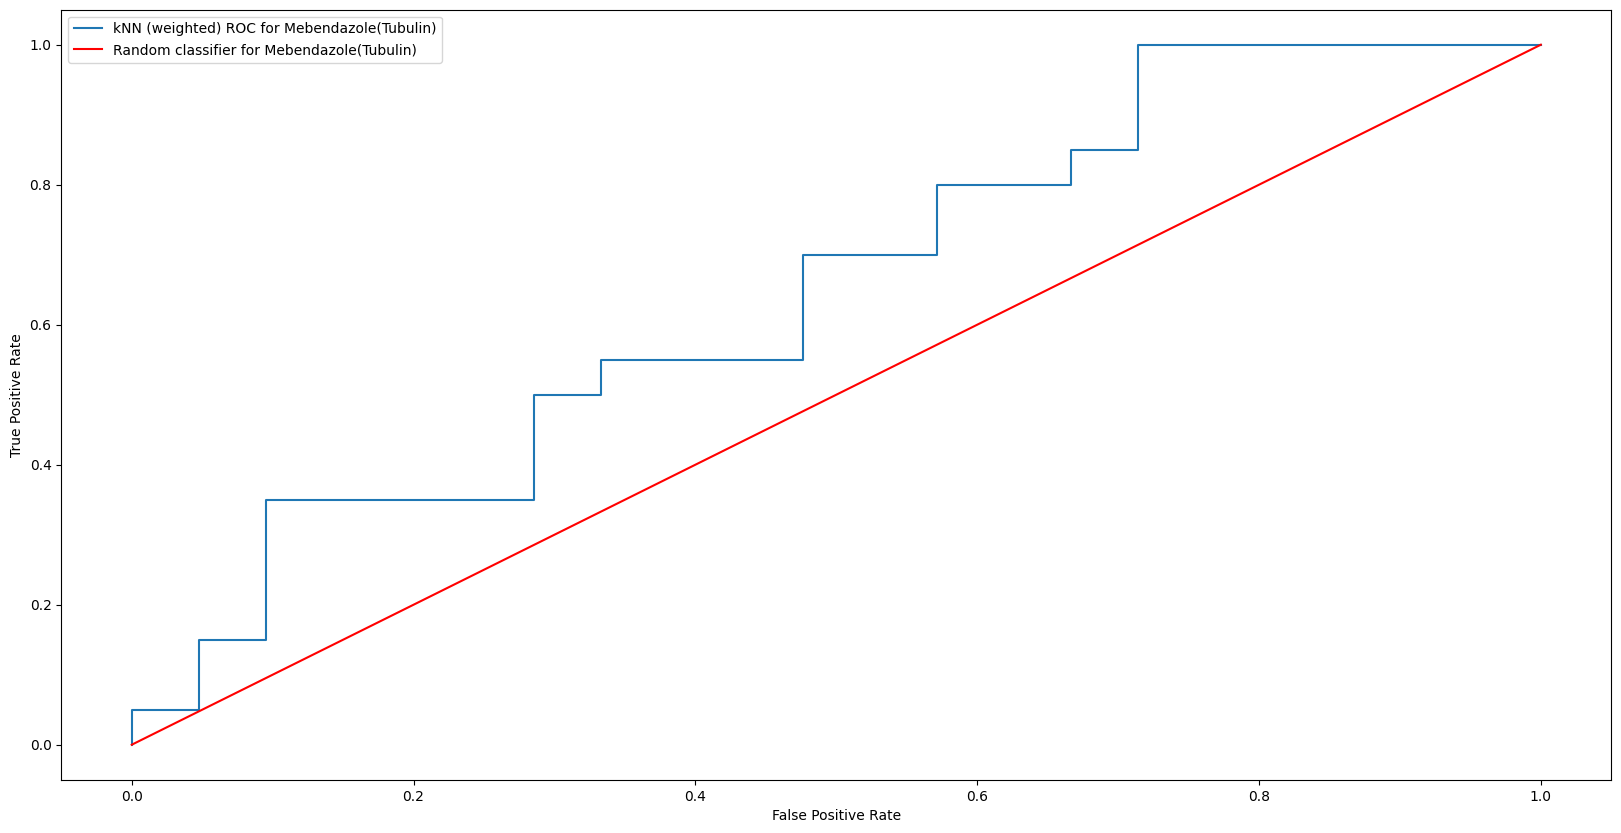

In [ ]:
#Creating dataframe for Mebendazole(Tubulin)
mebendazole_tubulin_df_weighted = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier_weighted(5, cell_line, gene_expressions, 'Mebendazole(Tubulin)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == 'Mebendazole(Tubulin)', cell_line].iloc[0]
  mebendazole_tubulin_df_weighted = mebendazole_tubulin_df_weighted.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
mebendazole_tubulin_df_weighted = mebendazole_tubulin_df_weighted[mebendazole_tubulin_df_weighted['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
mebendazole_tubulin_df_weighted = mebendazole_tubulin_df_weighted.sort_values(by = 'Predicted', ascending=True)

fpr, tpr, _ = metrics.roc_curve(mebendazole_tubulin_df_weighted['Actual'].values, mebendazole_tubulin_df_weighted['Predicted'].values)
plt.plot(fpr,tpr, label="kNN (weighted) ROC for Mebendazole(Tubulin)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for Mebendazole(Tubulin)")
plt.legend(loc="upper left")
plt.show()

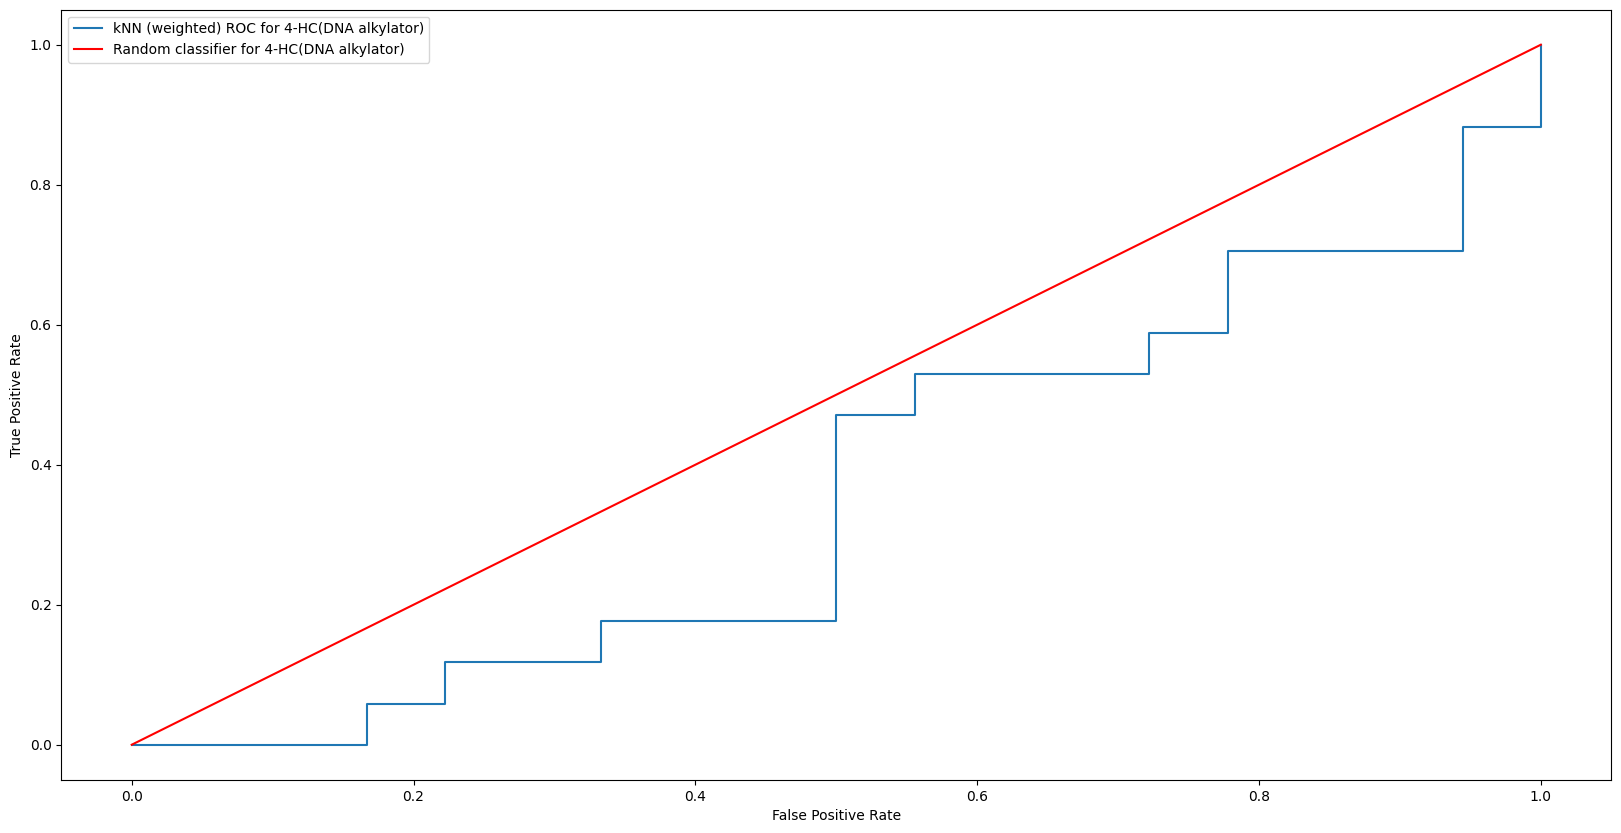

In [ ]:
#Creating dataframe for 4-HC(DNA alkylator)
hc4_DNA_alkylator_df_weighted = pd.DataFrame(columns = ['Cell Line', 'Actual', 'Predicted'])

for cell_line in cell_line_names:
  predicted = knn_classifier_weighted(5, cell_line, gene_expressions, '4-HC(DNA alkylator)', drug_sensitivity)
  actual = drug_sensitivity.loc[drug_sensitivity['HGNC_ID'] == '4-HC(DNA alkylator)', cell_line].iloc[0]
  hc4_DNA_alkylator_df_weighted = hc4_DNA_alkylator_df_weighted.append({'Cell Line' : cell_line, 'Actual' : actual, 'Predicted' : predicted},
        ignore_index = True)
  
hc4_DNA_alkylator_df_weighted = hc4_DNA_alkylator_df_weighted[hc4_DNA_alkylator_df_weighted['Actual'].notna()] #removing those rows where the actual value is NaN for a cell line
hc4_DNA_alkylator_df_weighted = hc4_DNA_alkylator_df_weighted.sort_values(by = 'Predicted', ascending=True)

fpr, tpr, _ = metrics.roc_curve(hc4_DNA_alkylator_df_weighted['Actual'].values, hc4_DNA_alkylator_df_weighted['Predicted'].values)
plt.plot(fpr,tpr, label="kNN (weighted) ROC for 4-HC(DNA alkylator)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
x = np.linspace(0.0,1.0,100)
y = x
plt.plot(x, y, '-r', label="Random classifier for 4-HC(DNA alkylator)")
plt.legend(loc="upper left")
plt.show()